## Importações e Informações do dataset

In [ ]:
# Importações necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Carregamento dos dados
file_path = '/content/drive/MyDrive/covid_data.csv'
data = pd.read_csv(file_path)

# Visualização dos dados
print("Primeiros registros do dataset:\n")
data.head()

Primeiros registros do dataset:



,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Pré-processamento

In [ ]:
# Tratamento de valores faltantes (se necessário)
# Aqui, vamos simplesmente remover linhas com valores faltantes, mas posso optar por outras estratégias dependendo da análise
data = data.dropna()

# Transformação de atributos categóricos para numéricos
# Identificação das colunas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns

# Transformação usando get_dummies
data = pd.get_dummies(data, columns=categorical_columns)

# Separação entre atributos (X) e rótulos (y)
X = data.drop(columns=['CLASIFFICATION_FINAL'])
y = data['CLASIFFICATION_FINAL']

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Árvore de Decisão CART

Matriz de Confusão:


[[   73     7   431     2    12   155  1001]
 [    4    25   241     0     6    46    48]
 [  337   228 26624    58   410  2744 45839]
 [    2     0   131     1     1     8   477]
 [   23     3  1260     2    42   215  3738]
 [  148    46  6291    11   140  3969 15091]
 [  192    54 17095    46   481  3093 78864]]

Relatório de Classificação:


              precision    recall  f1-score   support

           1       0.09      0.04      0.06      1681
           2       0.07      0.07      0.07       370
           3       0.51      0.35      0.41     76240
           4       0.01      0.00      0.00       620
           5       0.04      0.01      0.01      5283
           6       0.39      0.15      0.22     25696
           7       0.54      0.79      0.64     99825

    accuracy                           0.52    209715
   macro avg       0.24      0.20      0.20    209715
weighted avg       0.49      0.52      0.49    209715


Acurácia:
0.5226044870419378


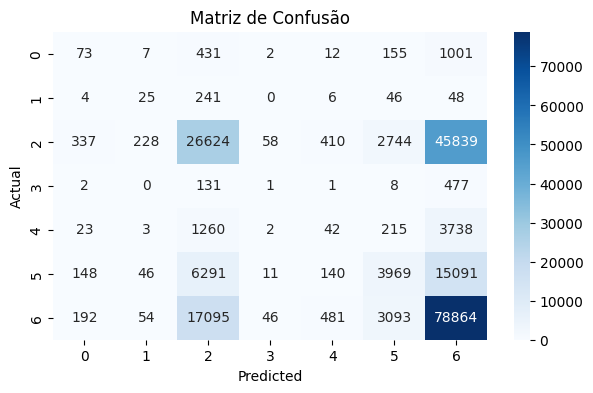

In [ ]:
# Criação e treinamento do classificador Árvore de Decisão
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predição e avaliação do modelo
y_pred = clf.predict(X_test)

# Avaliação do modelo
print("Matriz de Confusão:\n\n")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nRelatório de Classificação:\n\n")
print(classification_report(y_test, y_pred))
print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))

# Visualização da matriz de confusão
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()